<a href="https://colab.research.google.com/github/yee23456/AI_problem_analysis/blob/main/%E4%BD%9C%E6%A5%AD%E4%B8%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

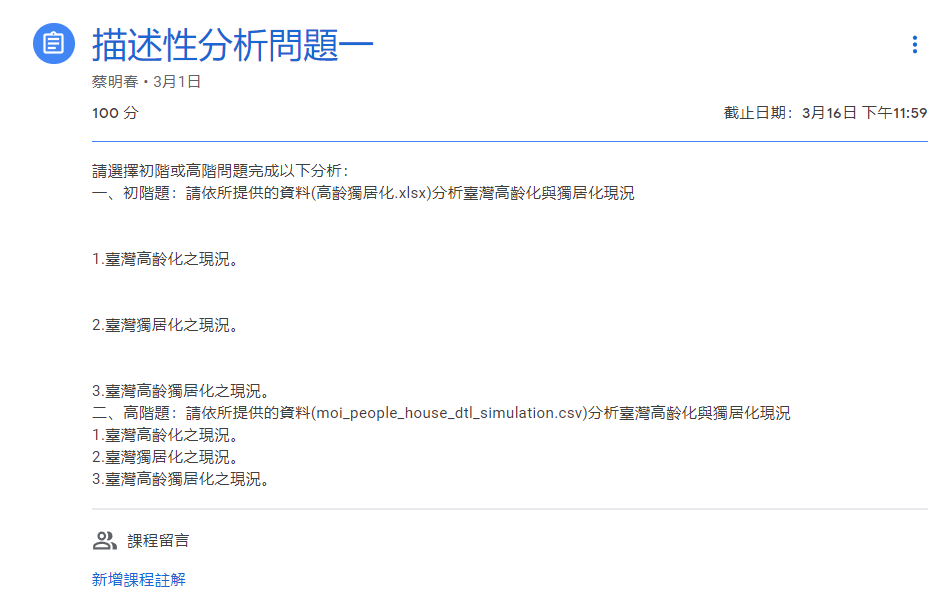

In [ ]:
!pip install geopandas

In [ ]:
!pip install geoplot

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# !!!!後續在相關函式中增加fontproperties=myfont屬性即可!!!!

In [ ]:
import geopandas as gpd
# import shapely
import pandas as pd
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import patches as mpatches

In [ ]:
df = pd.read_csv('高齡獨居化.csv')
plt.rcParams['figure.figsize']=(10,10)

#匯入地圖套件
town_TA = gpd.read_file('/content/drive/MyDrive/大學/闖關/闖關109_2/大數據資料/台灣地圖/TOWN_MOI_1081121.shp', encoding='utf-8')
# df=pd.read_excel('氣溫.xlsx')
# town_A_no = town_TA.merge(df, left_on=('COUNTYNAME'), right_on=('CITY'))

#匯入地區區碼
df_towm_id = pd.read_excel('/content/drive/MyDrive/大學/闖關/闖關109_2/大數據資料/鄉鎮市區.xlsx')
df_towm_id = df_towm_id.drop(['鄉鎮市區代碼'],axis = 1)

#區碼 跟 資料合併
df = df.merge(df_towm_id, left_on=('addr_city_cd'), right_on=('戶籍鄉鎮市區'))

#資料 跟 經緯度合併
town_A_no = town_TA.merge(df.groupby(['TOWNNAME']).sum(), left_on=('TOWNNAME'), right_on=('TOWNNAME'))
town_A_no

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry,addr_city_cd,Total_older,total_15-65_old,total_old_and_lonely,total_lonely,戶籍鄉鎮市區
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40982 23.21369, 121.40984 23.213...",10014020,2790,9774,649,2019,10014020
1,T21,10013210,屏東縣,佳冬鄉,Jiadong Township,T,10013,"POLYGON ((120.54846 22.46067, 120.54853 22.460...",10013210,4043,13365,849,2257,10013210
2,P13,10009130,雲林縣,麥寮鄉,Mailiao Township,P,10009,"POLYGON ((120.30198 23.81625, 120.30197 23.815...",10009130,5458,34289,1067,4081,10009130
3,V11,10014110,臺東縣,綠島鄉,Ludao Township,V,10014,"MULTIPOLYGON (((121.49155 22.67746, 121.49185 ...",10014110,464,3190,48,384,10014110
4,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((121.61180 21.94290, 121.61133 ...",10014160,386,4019,113,744,10014160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,D22,67000150,臺南市,七股區,Qigu District,D,67000,"POLYGON ((120.13989 23.19585, 120.14003 23.195...",67000150,4532,15791,988,2623,67000150
348,D23,67000160,臺南市,將軍區,Jiangjun District,D,67000,"POLYGON ((120.08374 23.24056, 120.08470 23.239...",67000160,4170,13908,925,2533,67000160
349,H10,68000100,桃園市,平鎮區,Pingzhen District,H,68000,"POLYGON ((121.22256 24.94984, 121.22259 24.949...",68000100,25915,167647,4446,22386,68000100
350,E02,64000020,高雄市,鼓山區,Gushan District,E,64000,"POLYGON ((120.27878 22.67380, 120.27891 22.673...",64000020,20807,99037,5259,21775,64000020


# 第一題



## 1.高齡


Text(0.5, 1.0, '臺灣高齡化之現況')

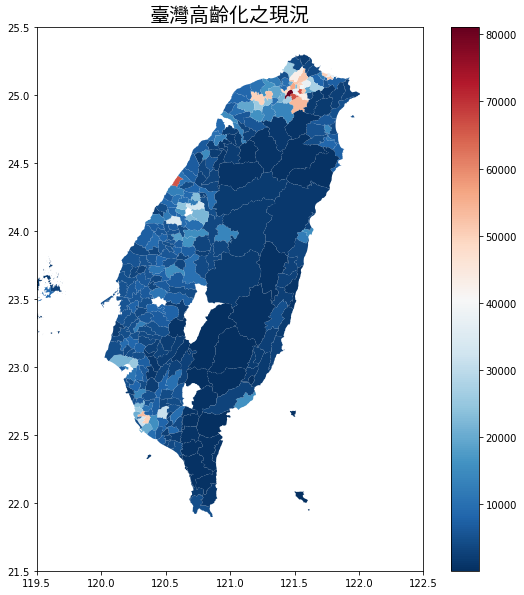

In [ ]:
SA=town_A_no.plot(column='Total_older',cmap='RdBu_r', legend=True)
SA.set_xlim(119.5, 122.5)
SA.set_ylim(21.5, 25.5)
plt.title("臺灣高齡化之現況",fontproperties=myfont,fontsize=20)

Text(0.5, 0, '臺灣高齡化之現況')

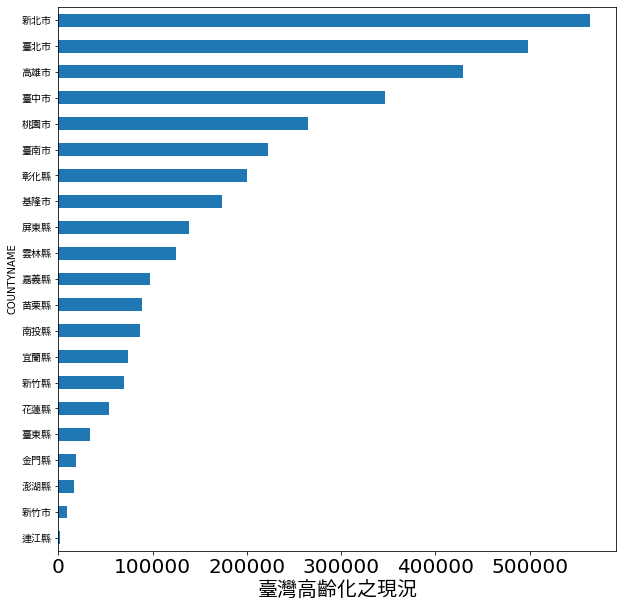

In [ ]:
axes = town_A_no.groupby('COUNTYNAME').sum().sort_values('Total_older')['Total_older'].plot.barh(fontsize=20)
for label in axes.get_yticklabels():
    label.set_fontproperties(myfont)
plt.xlabel('臺灣高齡化之現況',fontproperties=myfont,fontsize=20)

## 2.獨居


Text(0.5, 1.0, '臺灣高齡化之現況')

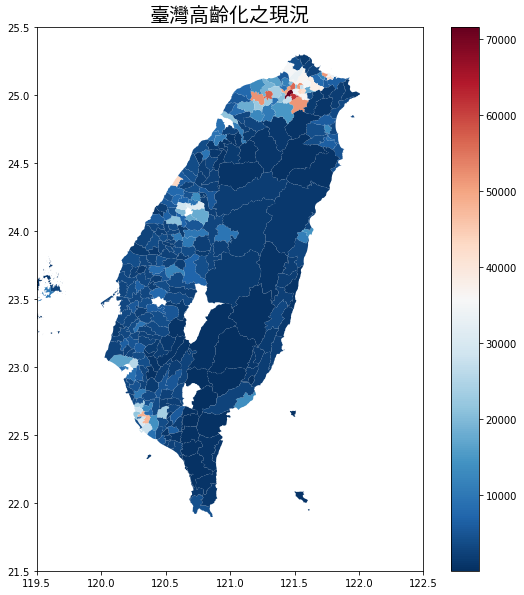

In [ ]:
SA=town_A_no.plot(column='total_lonely',cmap='RdBu_r', legend=True)
SA.set_xlim(119.5, 122.5)
SA.set_ylim(21.5, 25.5)
plt.title("臺灣獨居化之現況",fontproperties=myfont,fontsize=20)

Text(0.5, 0, '臺灣高齡化之現況')

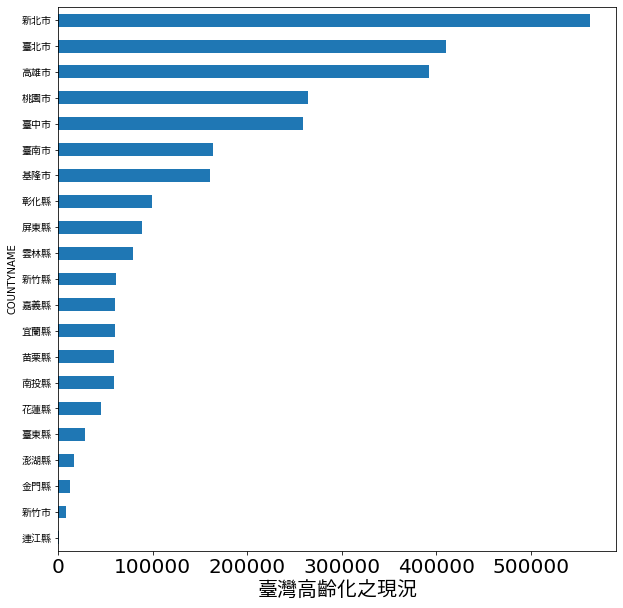

In [ ]:
axes = town_A_no.groupby('COUNTYNAME').sum().sort_values('total_lonely')['total_lonely'].plot.barh(fontsize=20)
for label in axes.get_yticklabels():
    label.set_fontproperties(myfont)
plt.xlabel('臺灣獨居化之現況',fontproperties=myfont,fontsize=20)

## 3.高齡且獨居

Text(0.5, 1.0, '臺灣高齡獨居化之現況。')

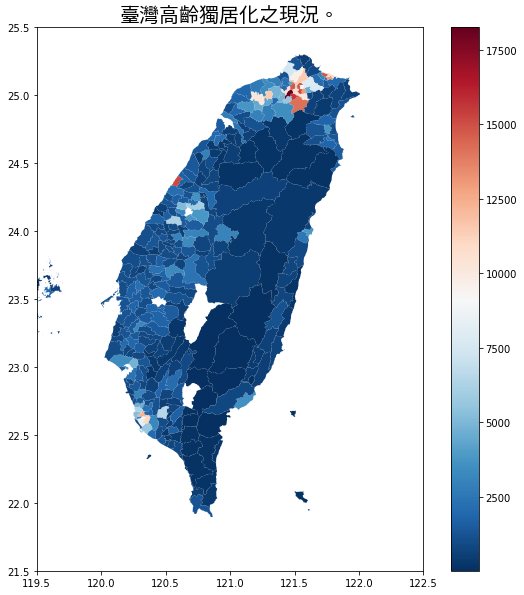

In [ ]:
SA=town_A_no.plot(column='total_old_and_lonely',cmap='RdBu_r', legend=True)
SA.set_xlim(119.5, 122.5)
SA.set_ylim(21.5, 25.5)
plt.title("臺灣高齡獨居化之現況。",fontproperties=myfont,fontsize=20)

Text(0.5, 0, '臺灣高齡獨居化之現況。')

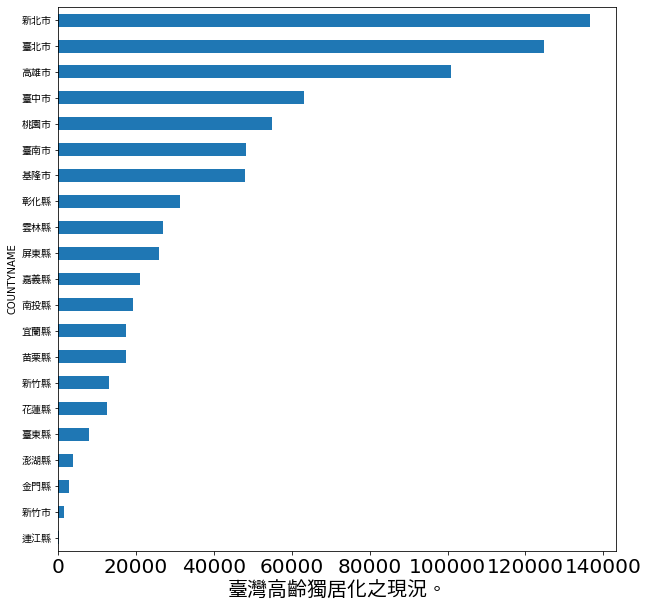

In [ ]:
axes = town_A_no.groupby('COUNTYNAME').sum().sort_values('total_old_and_lonely')['total_old_and_lonely'].plot.barh(fontsize=20)
for label in axes.get_yticklabels():
    label.set_fontproperties(myfont)
plt.xlabel('臺灣高齡獨居化之現況。',fontproperties=myfont,fontsize=20)

# 第二題

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/大學/闖關/闖關109_2/大數據資料/moi_people_house_dtl_simulation.csv')
data.dropna(axis=0, how='any', inplace=True)
data.head(5)

,person_sn,household_sn,coun_cd,addr_city_cd,gender_cd,birthday_date,birth_place_cd,education_cd,marriage_cd,living_type_cd,...,is_living_same_county,having_house_type_cd,floor_group_cd,purpose_group_cd,materials_group_cd,b_area,b_age,is_in_active_fault,is_in_lique_faction,is_in_dip_slope
0,1.0,1.0,10005,10005010,1,1945-09-10,10005,2,2,0,...,1,A,99,A,A,11.540861,37.0,0,0,0
3,4.0,4.0,10005,10005010,2,1951-09-26,10005,2,2,0,...,1,A,2,A,A,110.328155,24.0,2,4,2
6,7.0,7.0,10005,10005010,2,1975-03-13,10005,3,2,0,...,1,A,2,A,A,10.435569,8.0,0,0,0
14,15.0,15.0,10005,10005010,2,1955-01-26,10005,1,2,0,...,1,A,1,F,A,193.933016,12.0,0,0,0
16,16.0,16.0,10005,10005010,2,1938-01-04,10005,1,4,0,...,1,A,1,A,B,190.568848,29.0,0,0,0


## 1.高齡

In [ ]:
import time

In [ ]:
import datetime
times = datetime.datetime.now()
print(times.year)
print(times.month)
print(times.day)

2022
3
4


In [ ]:
data['old'] = data['birthday_date'].apply(lambda x: times.year - int(x[:4]))

In [ ]:
data['old']

0          77
3          71
6          47
14         67
16         84
           ..
2359261    73
2359270    63
2359311    78
2359317    72
2359360    68
Name: old, Length: 409965, dtype: int64